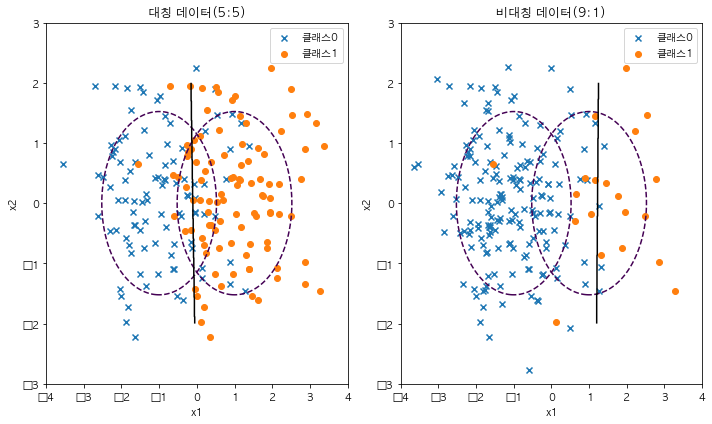

In [1]:
# 비대칭 데이터 문제

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from matplotlib import rc
import matplotlib as mpl
import warnings
warnings.filterwarnings(action="ignore")
rc('font', family="AppleGothic")
%matplotlib inline

from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC

def classification_result(n0, n1, title=""):
    rv1 = sp.stats.multivariate_normal([-1,0], [[1,0],[0,1]])
    rv2 = sp.stats.multivariate_normal([+1,0], [[1,0],[0,1]])
    X0 = rv1.rvs(n0, random_state=0)
    X1 = rv2.rvs(n1, random_state=0)
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n0), np.ones(n1)])
    
    x1min = -4; x1max = 4
    x2min = -2; x2max = 2
    xx1 = np.linspace(x1min, x1max, 1000)
    xx2 = np.linspace(x2min, x2max, 1000)
    X1, X2 = np.meshgrid(xx1, xx2)
    
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X,y)
    Y = np.reshape(model.predict(np.array([X1.ravel(),X2.ravel()]).T), X1.shape)
    plt.scatter(X[y==0,0], X[y==0,1], marker='x', label='클래스0')
    plt.scatter(X[y==1,0], X[y==1,1], marker='o', label='클래스1')
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4,4)
    plt.ylim(-3,3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title(title)
    
    return model, X, y, y_pred

plt.figure(figsize=(10,6))
plt.subplot(121)
model1, X1, y1, y_pred1 = classification_result(100, 100, "대칭 데이터(5:5)")
plt.subplot(122)
model2, X2, y2, y_pred2 = classification_result(180, 20, "비대칭 데이터(9:1)")
plt.tight_layout()
plt.show()

In [2]:
from sklearn.metrics import classification_report

# plot defined in kaggle article of Titanic data
# Reference: https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized confusion matrix"
        #print("Normalized confusion matrix")
    else:
        title = "Confusion matrix w/o normalization"
        #print("Confusion matrix w/o normalization")
    print(title)
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(classification_report(y1, y_pred1))
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       100
         1.0       0.81      0.87      0.84       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       180
         1.0       0.75      0.60      0.67        20

    accuracy                           0.94       200
   macro avg       0.85      0.79      0.82       200
weighted avg       0.94      0.94      0.94       200



Confusion matrix w/o normalization
[[87 13]
 [21 79]]


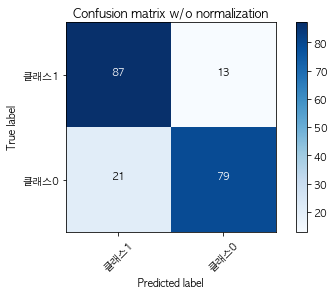

Confusion matrix w/o normalization
[[ 12   8]
 [  4 176]]


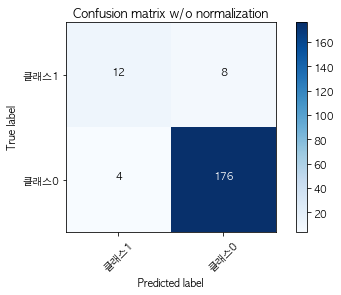

In [3]:
from sklearn.metrics import roc_curve, confusion_matrix

fpr1, tpr1, thr1 = roc_curve(y1, model1.decision_function(X1))
fpr2, tpr2, thr2 = roc_curve(y2, model2.decision_function(X2))

c1 = confusion_matrix(y1, y_pred1, labels=[1,0])
c2 = confusion_matrix(y2, y_pred2, labels=[1,0])
r1 = c1[0,0] / (c1[0,0]+c1[0,1])
r2 = c2[0,0] / (c2[0,0]+c2[0,1])
f1 = c1[1,0] / (c1[1,0]+c1[1,1])
f2 = c2[1,0] / (c2[1,0]+c2[1,1])

class_names = ["클래스{}".format(i) for i in [1,0]]
plt.figure()
plot_confusion_matrix(c1, classes=class_names)
plt.show()
plt.figure()
plot_confusion_matrix(c2, classes=class_names)
plt.show()

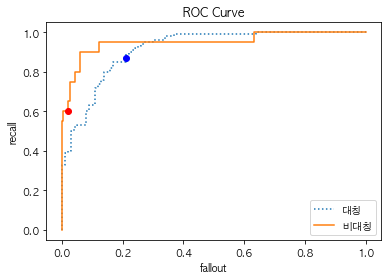

In [4]:
plt.plot(fpr1, tpr1, ":", label="대칭")
plt.plot(fpr2, tpr2, "-", label="비대칭")
plt.plot([f1], [r1], 'bo')
plt.plot([f2], [r2], 'ro')
plt.legend()
plt.xlabel('fallout')
plt.ylabel('recall')
plt.title('ROC Curve')
plt.show()

In [5]:
### Imbalanced data 해결방법
from imblearn.under_sampling import *
n0 = 200; n1 = 20
rv1 = sp.stats.multivariate_normal([-1,0], [[1,0],[0,1]])
rv2 = sp.stats.multivariate_normal([+1,0], [[1,0],[0,1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

X_test = np.vstack([rv1.rvs(100, random_state=1), 
                    rv2.rvs(100, random_state=1)])
y_test = np.hstack([np.zeros(100), np.ones(100)])

xx1 = np.linspace(-4, 4, 1000)
xx2 = np.linspace(-2, 2, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_results2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1,X2])), levels=[0.05], linestyle="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1,X2])), levels=[0.05], linestyle="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(),X2.ravel()]).T), X1.shape)
    plt.scatter(X[y==0,0], X[y==0,1], marker='x', label="클래스 0")
    plt.scatter(X[y==1,0], X[y==1,1], marker='o', label="클래스 1")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4,4)
    plt.ylim(-3,3)
    plt.legend(loc="best")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model


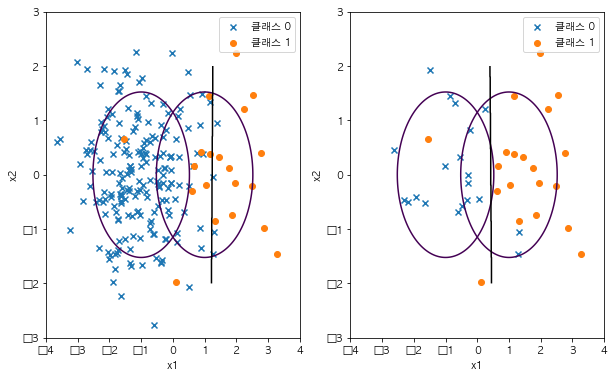

In [6]:
# [Under-sampling] Random Under-sampler
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(10,6))
plt.subplot(121)
model_imb = classification_results2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_results2(X_samp, y_samp)

In [7]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       200
         1.0       0.51      0.90      0.65        20

    accuracy                           0.91       220
   macro avg       0.75      0.91      0.80       220
weighted avg       0.95      0.91      0.92       220



In [8]:
print(classification_report(y_test, model_imb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.66      0.99      0.79       100
         1.0       0.98      0.48      0.64       100

    accuracy                           0.73       200
   macro avg       0.82      0.73      0.72       200
weighted avg       0.82      0.73      0.72       200



In [9]:
print(classification_report(y_test, model_samp.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       100
         1.0       0.90      0.82      0.86       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



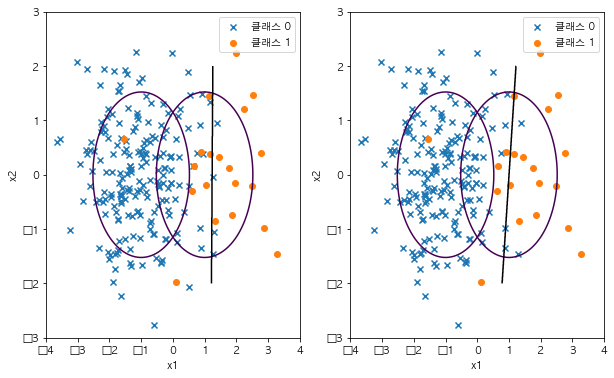

In [10]:
# [Under-sampling] Tomek's link method 
X_tomek, y_tomek = TomekLinks(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(10,6))
plt.subplot(121)
classification_results2(X_imb, y_imb)
plt.subplot(122)
model_tomek = classification_results2(X_tomek, y_tomek)

In [11]:
print(classification_report(y_imb, model_tomek.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       200
         1.0       0.70      0.70      0.70        20

    accuracy                           0.95       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.95      0.95      0.95       220



In [12]:
print(classification_report(y_test, model_tomek.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.97      0.82       100
         1.0       0.95      0.60      0.74       100

    accuracy                           0.79       200
   macro avg       0.83      0.78      0.78       200
weighted avg       0.83      0.79      0.78       200



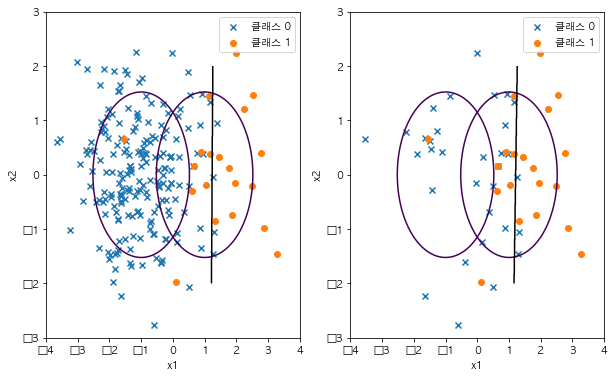

In [13]:
# [Under-sampling] Condensed Nearest Neighbour
X_cdnn, y_cdnn = CondensedNearestNeighbour(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(10,6))
plt.subplot(121)
classification_results2(X_imb, y_imb)
plt.subplot(122)
model_cdnn = classification_results2(X_cdnn, y_cdnn)

In [14]:
print(classification_report(y_imb, model_cdnn.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



In [15]:
print(classification_report(y_test, model_cdnn.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.66      0.97      0.78       100
         1.0       0.94      0.49      0.64       100

    accuracy                           0.73       200
   macro avg       0.80      0.73      0.71       200
weighted avg       0.80      0.73      0.71       200



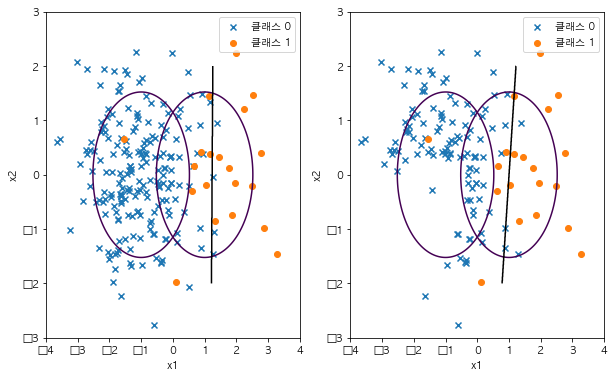

In [16]:
# [Under-sampling] One Sided Selection: Tomek link + Condensed Nearest Neighbour
X_oss, y_oss = OneSidedSelection(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(10,6))
plt.subplot(121)
classification_results2(X_imb, y_imb)
plt.subplot(122)
model_oss = classification_results2(X_oss, y_oss)

In [17]:
print(classification_report(y_imb, model_oss.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       200
         1.0       0.70      0.70      0.70        20

    accuracy                           0.95       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.95      0.95      0.95       220



In [18]:
print(classification_report(y_test, model_oss.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.97      0.82       100
         1.0       0.95      0.60      0.74       100

    accuracy                           0.79       200
   macro avg       0.83      0.78      0.78       200
weighted avg       0.83      0.79      0.78       200



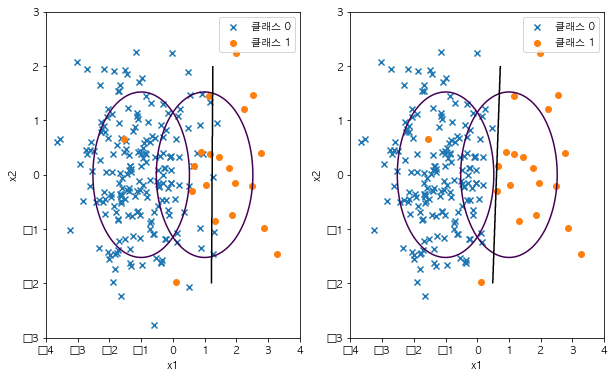

In [19]:
# [Under-sampling] Edited Nearest Nighbours
# : 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 
#   모두(kind_sel="all") 혹은 다수(kind_sel="mode")가 다수클래스가 아닌 경우 제거
X_enn, y_enn = EditedNearestNeighbours(kind_sel="all", n_neighbors=5,
                                      random_state=0).fit_sample(X_imb, y_imb)
plt.figure(figsize=(10,6))
plt.subplot(121)
classification_results2(X_imb, y_imb)
plt.subplot(122)
model_enn = classification_results2(X_enn, y_enn)

In [20]:
print(classification_report(y_imb, model_enn.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       200
         1.0       0.58      0.90      0.71        20

    accuracy                           0.93       220
   macro avg       0.79      0.92      0.83       220
weighted avg       0.95      0.93      0.94       220



In [21]:
print(classification_report(y_test, model_enn.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       100
         1.0       0.92      0.79      0.85       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



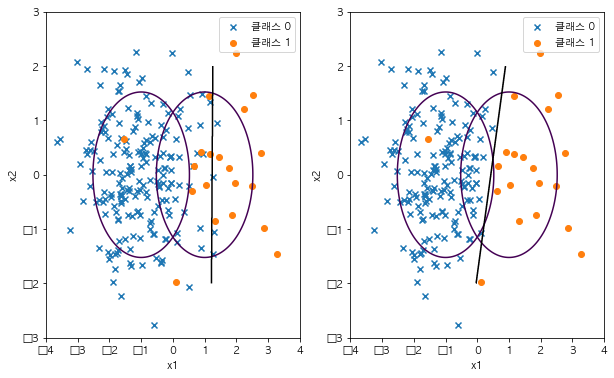

In [22]:
# [Under-sampling] Neighbourhood Cleaning Rule = CNN + ENN
X_ncr, y_ncr = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5,
                                         random_state=0).fit_sample(X_imb, y_imb)
plt.figure(figsize=(10,6))
plt.subplot(121)
classification_results2(X_imb, y_imb)
plt.subplot(122)
model_ncr = classification_results2(X_ncr, y_ncr)

In [23]:
print(classification_report(y_imb, model_ncr.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       200
         1.0       0.56      0.95      0.70        20

    accuracy                           0.93       220
   macro avg       0.78      0.94      0.83       220
weighted avg       0.96      0.93      0.94       220



In [24]:
print(classification_report(y_test, model_ncr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       100
         1.0       0.90      0.82      0.86       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



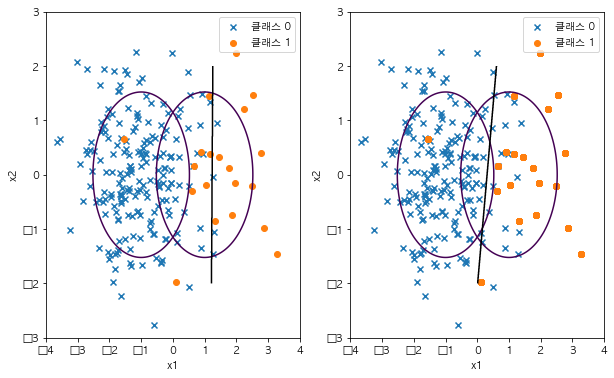

In [25]:
from imblearn.over_sampling import *

# [Over-sampling] Random
X_rand, y_rand = RandomOverSampler(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(10,6))
plt.subplot(121)
classification_results2(X_imb, y_imb)
plt.subplot(122)
model_rand = classification_results2(X_rand, y_rand)

In [26]:
print(classification_report(y_imb, model_rand.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       200
         1.0       0.51      0.95      0.67        20

    accuracy                           0.91       220
   macro avg       0.75      0.93      0.81       220
weighted avg       0.95      0.91      0.92       220



In [27]:
print(classification_report(y_test, model_rand.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       100
         1.0       0.89      0.85      0.87       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



In [28]:
# more accurate than random under-sampling

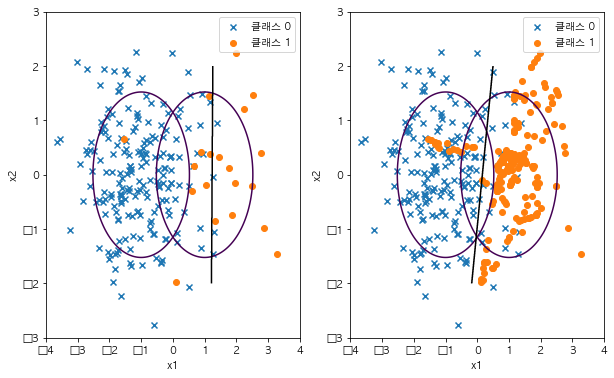

In [29]:
# [Over-sampling] Adaptive Synthetic Sampling 
# : 소수 클래스 데이터 중 임의의 가까운 k개 데이터 중 
#   무작위로 선택된 데이터 사이 직선상에 소수 클래스 데이터 생성
X_adss, y_adss = ADASYN(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(10,6))
plt.subplot(121)
classification_results2(X_imb, y_imb)
plt.subplot(122)
model_adss = classification_results2(X_adss, y_adss)

In [30]:
print(classification_report(y_imb, model_adss.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       200
         1.0       0.47      0.95      0.63        20

    accuracy                           0.90       220
   macro avg       0.73      0.92      0.79       220
weighted avg       0.95      0.90      0.91       220



In [31]:
print(classification_report(y_test, model_adss.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       100
         1.0       0.87      0.88      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



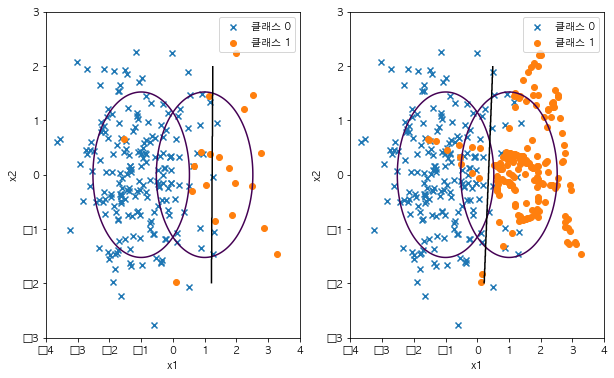

In [32]:
# [Over-sampling] Synthetic Minority Over-sampling Technique
X_smote, y_smote = SMOTE(random_state=4).fit_sample(X_imb, y_imb)

plt.figure(figsize=(10,6))
plt.subplot(121)
classification_results2(X_imb, y_imb)
plt.subplot(122)
model_smote = classification_results2(X_smote, y_smote)

In [33]:
print(classification_report(y_imb, model_smote.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       200
         1.0       0.50      0.90      0.64        20

    accuracy                           0.91       220
   macro avg       0.74      0.91      0.80       220
weighted avg       0.94      0.91      0.92       220



In [34]:
print(classification_report(y_test, model_smote.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       100
         1.0       0.90      0.83      0.86       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



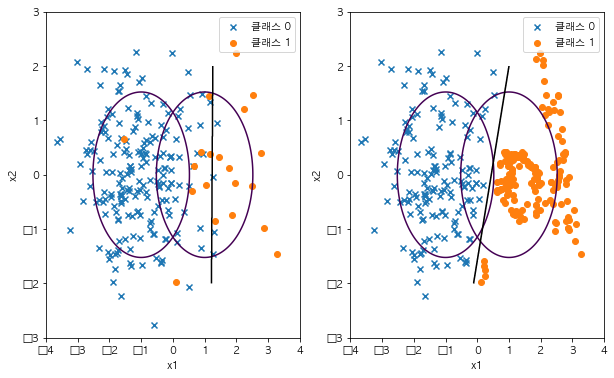

In [35]:
from imblearn.combine import *

# [Combine-sampling] SMOTE + ENN
X_smoteenn, y_smoteenn = SMOTEENN(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(10,6))
plt.subplot(121)
classification_results2(X_imb, y_imb)
plt.subplot(122)
model_smoteenn = classification_results2(X_smoteenn, y_smoteenn)

In [36]:
print(classification_report(y_imb, model_smoteenn.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96       200
         1.0       0.54      0.95      0.69        20

    accuracy                           0.92       220
   macro avg       0.77      0.94      0.82       220
weighted avg       0.95      0.92      0.93       220



In [37]:
print(classification_report(y_test, model_smote.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       100
         1.0       0.90      0.83      0.86       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [38]:
## similar performance with [under-sampling] one-sided selection

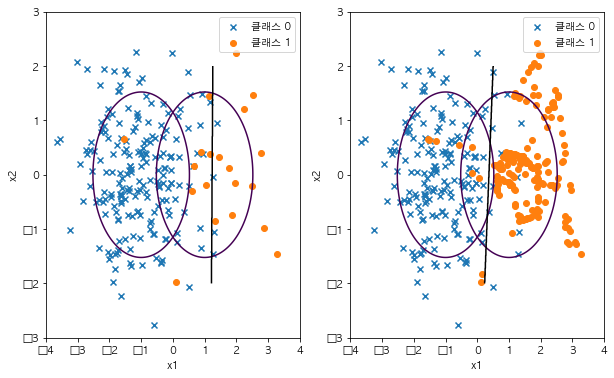

In [39]:
# [Combine-sampling] SMOTE + Tomek
X_smotetm, y_smotetm = SMOTETomek(random_state=4).fit_sample(X_imb, y_imb)

plt.figure(figsize=(10,6))
plt.subplot(121)
classification_results2(X_imb, y_imb)
plt.subplot(122)
model_smotetm = classification_results2(X_smotetm, y_smotetm)

In [40]:
print(classification_report(y_imb, model_smotetm.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       200
         1.0       0.51      0.90      0.65        20

    accuracy                           0.91       220
   macro avg       0.75      0.91      0.80       220
weighted avg       0.95      0.91      0.92       220



In [41]:
print(classification_report(y_test, model_smotetm.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       100
         1.0       0.90      0.83      0.86       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

